<a href="https://colab.research.google.com/github/raz0208/Agritech-Pest-Prediction/blob/main/Agritech_Pest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model implementation: Classification Problem

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np

## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import rewuired libraries for classification tasks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Logistic Regression and Decision Tree classification

In [3]:
# Read data
FeatureExtracted_DS = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Showing first rows of preprocessed Agritech Pest dataset
print(FeatureExtracted_DS.head())

         Date      Time  Number of Insects  New Catches  Event   Location  \
0  2024-07-06  06:01:00                0.0          0.0      0  Cicalino1   
1  2024-07-07  06:04:00                0.0          0.0      0  Cicalino1   
2  2024-07-08  06:03:00                0.0          0.0      0  Cicalino1   
3  2024-07-09  06:05:00                0.0          0.0      1  Cicalino1   
4  2024-07-10  06:03:00                0.0          0.0      0  Cicalino1   

   Average Temperature  Temp_low  Temp_high  Average Humidity  ...  \
0                13.91      13.6       14.4             97.65  ...   
1                20.78      20.1       21.2             83.49  ...   
2                19.03      18.7       19.5             96.87  ...   
3                15.33      15.0       15.7             82.29  ...   
4                15.48      15.0       16.0             87.12  ...   

   Day Max_temp  Day Avg_Humidity  Temp_change  Year  Month  Day  Weekday  \
0          30.6             72.25      

In [4]:
# Summary of dataset
FeatureExtracted_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 153 non-null    object 
 1   Time                 153 non-null    object 
 2   Number of Insects    153 non-null    float64
 3   New Catches          153 non-null    float64
 4   Event                153 non-null    int64  
 5   Location             153 non-null    object 
 6   Average Temperature  153 non-null    float64
 7   Temp_low             153 non-null    float64
 8   Temp_high            153 non-null    float64
 9   Average Humidity     153 non-null    float64
 10  Day Avg_temp         153 non-null    float64
 11  Day Min_temp         153 non-null    float64
 12  Day Max_temp         153 non-null    float64
 13  Day Avg_Humidity     153 non-null    float64
 14  Temp_change          153 non-null    float64
 15  Year                 153 non-null    int

In [5]:
# Summary of dataset
print(FeatureExtracted_DS.describe())

       Number of Insects  New Catches       Event  Average Temperature  \
count         153.000000   153.000000  153.000000           153.000000   
mean            0.392157     0.169935    0.163399            20.569641   
std             0.844762     0.497240    0.370943             2.855747   
min             0.000000     0.000000    0.000000            13.910000   
25%             0.000000     0.000000    0.000000            18.490000   
50%             0.000000     0.000000    0.000000            20.280000   
75%             0.000000     0.000000    0.000000            22.450000   
max             5.000000     4.000000    1.000000            27.000000   

         Temp_low   Temp_high  Average Humidity  Day Avg_temp  Day Min_temp  \
count  153.000000  153.000000        153.000000    153.000000    153.000000   
mean    20.224183   20.977451         82.332582     27.029020     18.768301   
std      2.787006    2.934341         10.905657      2.160891      1.998641   
min     13.600000

In [6]:
# Check for missing values
print(FeatureExtracted_DS.isnull().sum())

Date                   0
Time                   0
Number of Insects      0
New Catches            0
Event                  0
Location               0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Day Avg_temp           0
Day Min_temp           0
Day Max_temp           0
Day Avg_Humidity       0
Temp_change            0
Year                   0
Month                  0
Day                    0
Weekday                0
Lag_1                  0
Lag_2                  0
Lag_3                  0
dtype: int64


### Logistic Regression and Decision Tree classifier

In [13]:
# Copy dataset to nw dataframe
df0 = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Load the dataset
X0 = df0.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns and target
y0 = df0["New Catches"]

# Split into train and test sets
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X0_train_scaled = scaler.fit_transform(X0_train)
X0_test_scaled = scaler.transform(X0_test)

# Initialize models
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)

models0 = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_clf
}

results0 = {}
predictions0 = {}

# Train and evaluate each model
for name0, model0 in models0.items():
    model0.fit(X0_train_scaled if name0 == "Logistic Regression" else X0_train, y0_train)
    y0_pred = model0.predict(X0_test_scaled if name0 == "Logistic Regression" else X0_test)
    predictions0[name0] = y0_pred
    acc0 = accuracy_score(y0_test, y0_pred)
    results0[name0] = acc0
    print(f"{name0} Accuracy: {acc0:.4f}")
    print(classification_report(y0_test, y0_pred))

Logistic Regression Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.50      0.40      0.44         5

    accuracy                           0.84        31
   macro avg       0.69      0.66      0.68        31
weighted avg       0.83      0.84      0.83        31

Decision Tree Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.50      0.40      0.44         5

    accuracy                           0.84        31
   macro avg       0.69      0.66      0.68        31
weighted avg       0.83      0.84      0.83        31



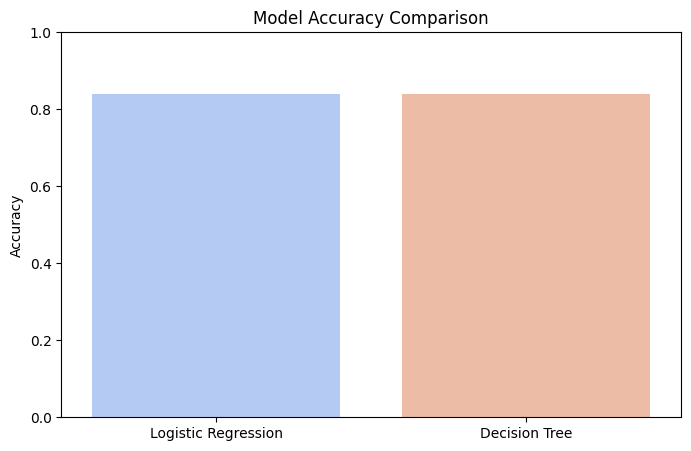

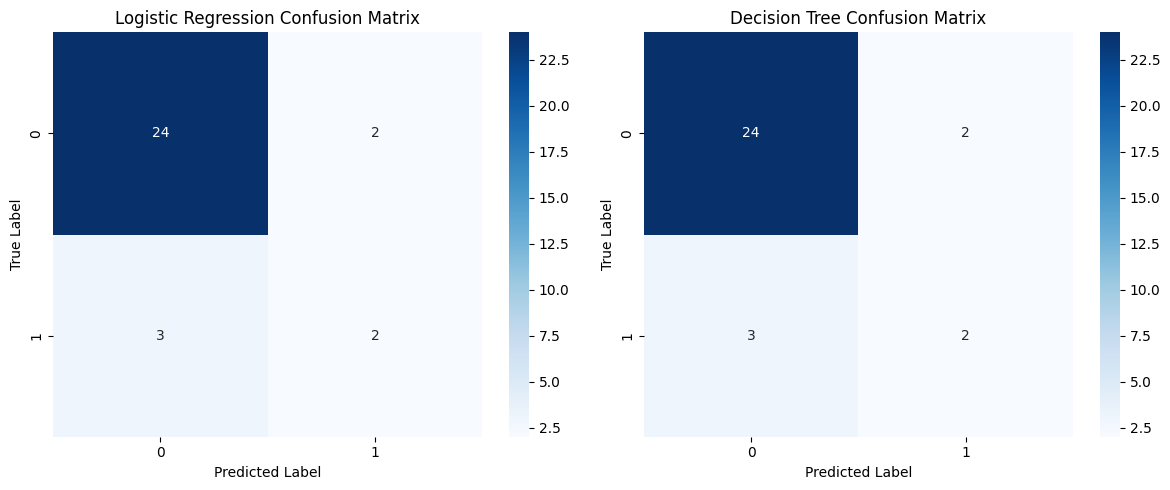

In [14]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results0.keys()), y=list(results0.values()), palette="coolwarm", legend=False, hue=models0.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print("\n")
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name0, y0_pred) in enumerate(predictions0.items()):
    cm0 = confusion_matrix(y0_test, y0_pred)
    sns.heatmap(cm0, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name0} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Random Forest and Gradient Boosting classifiers, including XGBoost, LightGBM, and CatBoost

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [19]:
# Copy dataset to nw dataframe
df1 = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Load the dataset (assuming 'df' is already preprocessed)
X1 = df1.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y1 = df1["New Catches"].astype(int)

# Split into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)

models1 = {
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    #"XGBoost": xgb_clf
}

results1 = {}
predictions1 = {}

# Train and evaluate each model
for name1, model1 in models1.items():
    model1.fit(X1_train, y1_train)
    y1_pred = model1.predict(X1_test)
    predictions1[name1] = y1_pred
    acc1 = accuracy_score(y1_test, y1_pred)
    results1[name1] = acc1
    print(f"{name1} Accuracy: {acc1:.4f}")
    print(classification_report(y1_test, y1_pred))

Random Forest Accuracy: 0.7742
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg       0.41      0.46      0.44        31
weighted avg       0.69      0.77      0.73        31

Gradient Boosting Accuracy: 0.9032
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.67      0.80      0.73         5

    accuracy                           0.90        31
   macro avg       0.81      0.86      0.83        31
weighted avg       0.91      0.90      0.91        31



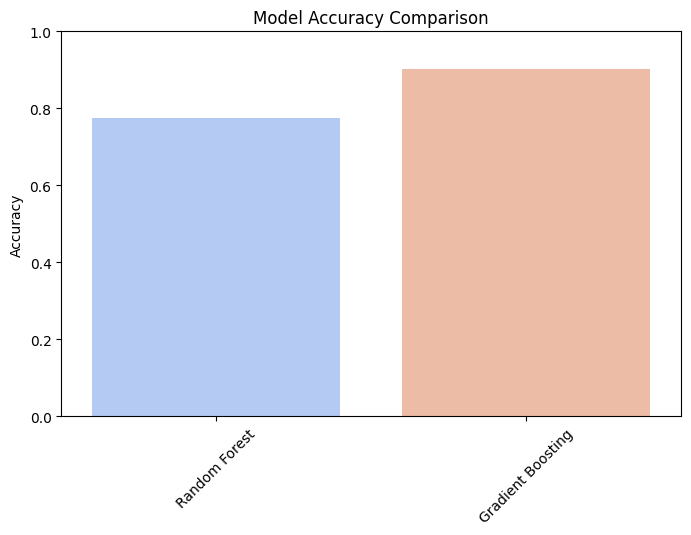

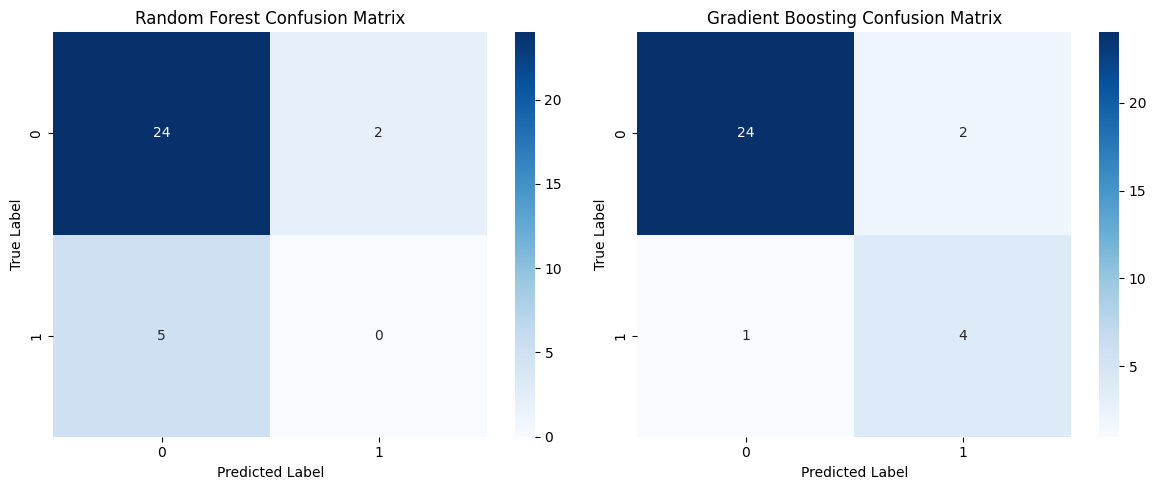

In [20]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results1.keys()), y=list(results1.values()), palette="coolwarm", legend=False, hue=models1.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\n")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, (name1, y1_pred) in enumerate(predictions1.items()):
    cm1 = confusion_matrix(y1_test, y1_pred)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name1} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Neural Networks (MLP Classifier)

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [21]:
# Copy dataset to nw dataframe
df2 = pd.read_csv('/content/FeatureExtracted_dataset.csv')

# Load the dataset (assuming 'df' is already preprocessed)
X2 = df2.drop(columns=["New Catches", "Date", "Time", "Location"])  # Drop non-numeric columns
y2 = df2["New Catches"]

# Split into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize features for SVM and MLP
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Initialize models
svm_clf = SVC(kernel='rbf', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

models2 = {
    "Support Vector Machine": svm_clf,
    "K-Nearest Neighbors": knn_clf,
    "Neural Network (MLP)": mlp_clf
}

results2 = {}
predictions2 = {}

# Train and evaluate each model
for name2, model2 in models2.items():
    model2.fit(X2_train_scaled if name2 in ["Support Vector Machine", "Neural Network (MLP)"] else X2_train, y2_train)
    y2_pred = model2.predict(X2_test_scaled if name2 in ["Support Vector Machine", "Neural Network (MLP)"] else X2_test)
    predictions2[name2] = y2_pred
    acc2 = accuracy_score(y2_test, y2_pred)
    results2[name2] = acc2
    print(f"{name2} Accuracy: {acc2:.4f}")
    print(classification_report(y2_test, y2_pred))

Support Vector Machine Accuracy: 0.7742
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg       0.41      0.46      0.44        31
weighted avg       0.69      0.77      0.73        31

K-Nearest Neighbors Accuracy: 0.8387
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        26
         1.0       0.50      0.20      0.29         5

    accuracy                           0.84        31
   macro avg       0.68      0.58      0.60        31
weighted avg       0.80      0.84      0.81        31

Neural Network (MLP) Accuracy: 0.7742
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.00      0.00      0.00         5

    accuracy                           0.77        31
   macro avg 

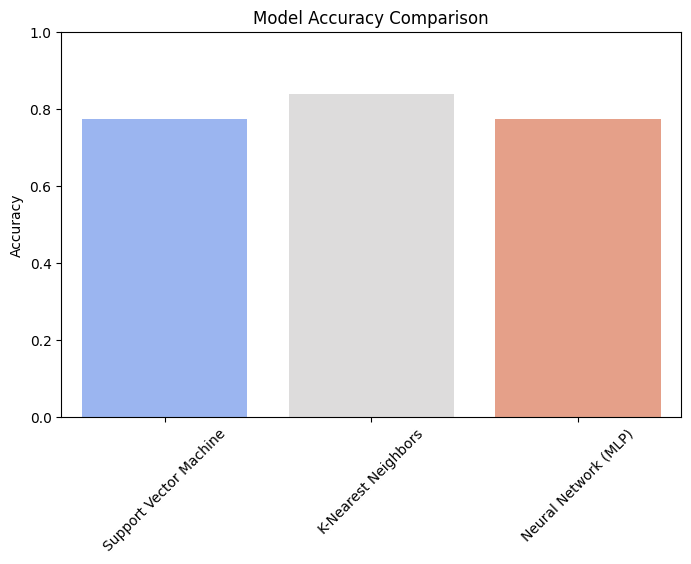

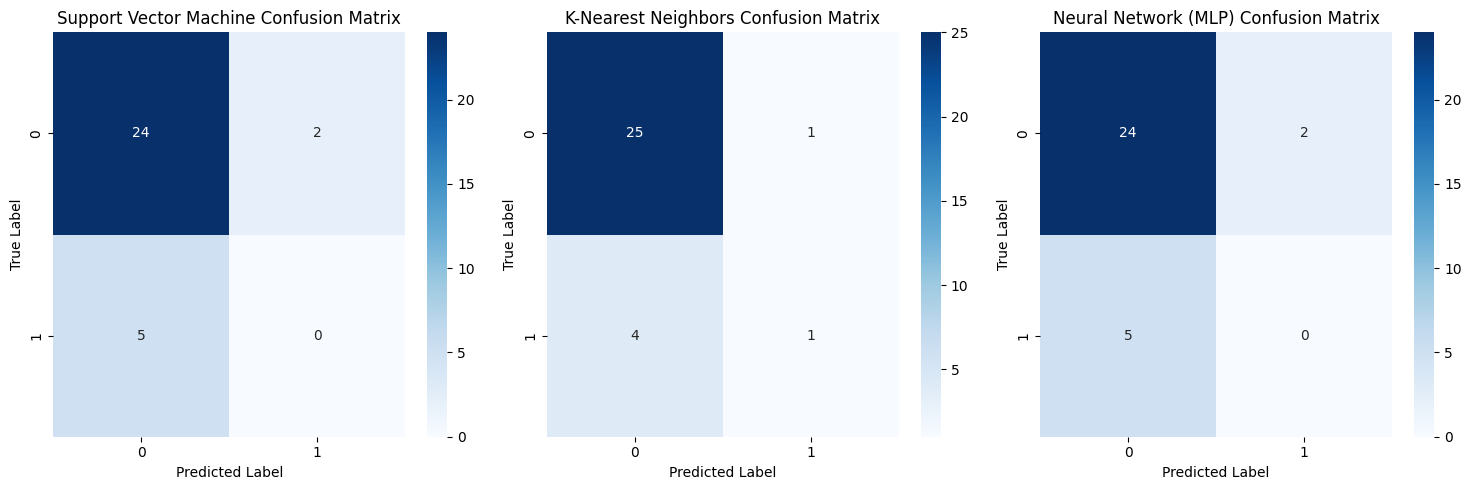

In [22]:
# Visualization of Accuracy Scores
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=list(results2.keys()), y=list(results2.values()), palette="coolwarm", legend=False, hue=models2.keys())
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("\n")

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name2, y2_pred) in enumerate(predictions2.items()):
    cm = confusion_matrix(y2_test, y2_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name2} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()